In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from tqdm import tqdm

In [55]:
series_to_img = lambda serie: plt.imshow(serie.to_numpy(dtype=float).reshape((64, 64)))

In [ ]:
dataframes = []
with open("sprites.csv") as file:
    reader = csv.reader(file)
    header = next(reader)

    mode_idx = header.index("mode")


    tmp_pkmn = 0
    tmp_df = []
    for row in tqdm(reader):
        if int(row[0]) != tmp_pkmn:
            tmp_df = np.array(tmp_df, dtype=int)
            tmp_df = pd.DataFrame(tmp_df, columns=header)
            mean_pixel = tmp_df.iloc[:,3:].mean().tolist()
            median_pixel = tmp_df.iloc[:,3:].median().tolist()
            std_pixel = tmp_df.iloc[:,3:].std().tolist()
            dataframes.append([tmp_df["pkmn_nb"].iloc[0], tmp_df["idx"].iloc[-1], "mean"]+mean_pixel)
            dataframes.append([tmp_df["pkmn_nb"].iloc[0], tmp_df["idx"].iloc[-1], "median"]+median_pixel)
            dataframes.append([tmp_df["pkmn_nb"].iloc[0], tmp_df["idx"].iloc[-1], "std"]+std_pixel)
            tmp_pkmn = int(row[0])
            tmp_df = []

        if str(row[mode_idx]) == "0":
            tmp_df.append(row)

dataframe = pd.DataFrame(dataframes)
dataframe.columns = dataframe.columns-3
dataframe.columns = ["pkmn_id", "nb_frames", "method"] + list(dataframe.columns[3:])

219129it [00:56, 3890.52it/s]


In [22]:
dataframe

,pkmn_id,nb_frames,method,0,1,2,3,4,5,6,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,50,mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,50,median,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,50,std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,55,mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,55,median,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,97,77,median,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2474,97,77,std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2475,98,77,mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2476,98,77,median,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


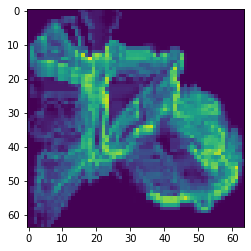

In [56]:
series_to_img(dataframe.iloc[71, 3:]) # c'est ossatueur

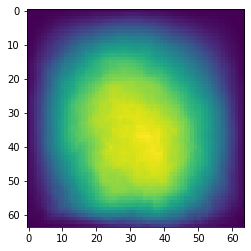

In [ ]:
# On sélectionne la moyenne et de toutes les images
series_to_img(dataframe[dataframe["method"] == "mean"].iloc[:, 3:].mean())

Cette visualisation permet d'apercevoir que les bordures sont des zones où très peu de pixels colorés sont présent.

En prenant la médiane des valeurs médianes, on s'aperçoit d'un contour relativement précis des pixels colorés. On remarqe que le bas du sprite est une ligne presque droite aussi

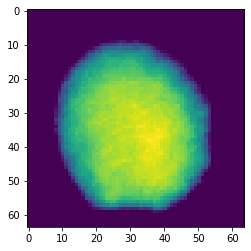

In [61]:
series_to_img(dataframe[dataframe["method"] == "median"].iloc[:, 3:].median())

En prenant la déviation, on peut apercevoir deux clusters autour du centre : c'est dans ces zones que le plus de "mouvements" ce fait.

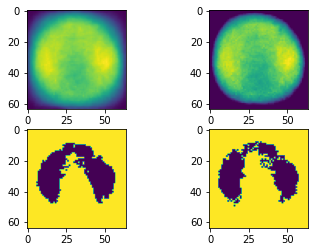

In [84]:
f, ax = plt.subplots(2, 2)
ax[0][0].imshow(dataframe[dataframe["method"] == "std"].iloc[:, 3:].mean().to_numpy().reshape((64, 64)))
ax[0][1].imshow(dataframe[dataframe["method"] == "std"].iloc[:, 3:].median().to_numpy().reshape((64, 64)))
ax[1][0].imshow(dataframe[dataframe["method"] == "std"].iloc[:, 3:].mean().to_numpy().reshape((64, 64))<38)
ax[1][1].imshow(dataframe[dataframe["method"] == "std"].iloc[:, 3:].median().to_numpy().reshape((64, 64))<38)